# 엑셀윙스 시작하기

## 엑셀을 데이터 뷰어로 사용하기

In [1]:
# 먼저 이 장에서 사용할 패키지를 임포트합니다
import datetime as dt
import xlwings as xw
import pandas as pd
import numpy as np

In [2]:
# 의사 난수로 데이터 프레임을 만듭니다
# 맨 위와 맨 아래만 보이도록 행 수는 충분히 많게 합니다
df = pd.DataFrame(data=np.random.randn(100, 5),
                  columns=[f"Trial {i}" for i in range(1, 6)])
df

,Trial 1,Trial 2,Trial 3,Trial 4,Trial 5
0,0.047933,0.615144,-1.471050,-0.576397,1.265568
1,-2.111221,-0.628826,0.185540,1.159792,-0.704092
2,0.685833,0.288920,-0.866454,-0.262343,-0.142626
3,-0.521253,1.667248,0.556121,-0.859258,-0.311463
4,-0.207636,0.263507,-0.948421,-1.465001,1.187515
...,...,...,...,...,...
95,-0.474621,-0.397671,0.510521,1.044292,-0.399269
96,-0.870658,0.888190,0.353820,-0.208309,0.259661
97,-0.576956,-0.463071,1.956147,0.435258,-1.122232
98,-1.978362,-1.017442,1.226275,-1.215537,0.957907


In [3]:
# 데이터 프레임을 엑셀에서 봅니다
xw.view(df)

## 엑셀 객체 모델

In [4]:
# 빈 워크북을 새로 만들고 이름을 출력합니다
# 이 워크북은 이 장의 예제 대부분에서 사용할 겁니다
book = xw.Book()
book.name

'통합 문서2'

In [5]:
# sheets 컬렉션에 접근합니다
book.sheets

Sheets([<Sheet [통합 문서2]Sheet1>])

In [6]:
# 인덱스나 이름으로 sheet 객체를 가져옵니다
# 이름이 다를 경우 "Sheet1"을 바꿔야 할 수도 있습니다
sheet1 = book.sheets[0]
sheet1 = book.sheets["Sheet1"]

In [7]:
sheet1.range("A1")

<Range [통합 문서2]Sheet1!$A$1>

In [8]:
# 가장 자주 하는 작업 - 값을 씁니다
sheet1.range("A1").value = [[1, 2],
                            [3, 4]]
sheet1.range("A4").value = "Hello!"

In [9]:
# 그리고 값을 읽습니다
sheet1.range("A1:B2").value

[[1.0, 2.0], [3.0, 4.0]]

In [10]:
sheet1.range("A4").value

'Hello!'

In [11]:
# 인덱스
sheet1.range("A1:B2")[0, 0]

<Range [통합 문서2]Sheet1!$A$1>

In [12]:
# 슬라이스
sheet1.range("A1:B2")[:, 1]

<Range [통합 문서2]Sheet1!$B$1:$B$2>

In [13]:
# 셀 하나: A1 표기법
sheet1["A1"]

<Range [통합 문서2]Sheet1!$A$1>

In [14]:
# 셀 여러 개: A1 표기법
sheet1["A1:B2"]

<Range [통합 문서2]Sheet1!$A$1:$B$2>

In [15]:
# 셀 하나: 인덱스
sheet1[0, 0]

<Range [통합 문서2]Sheet1!$A$1>

In [16]:
# 셀 여러 개: 슬라이스
sheet1[:2, :2]

<Range [통합 문서2]Sheet1!$A$1:$B$2>

In [17]:
# D10: 시트 인덱스로 접근
sheet1[9, 3]

<Range [통합 문서2]Sheet1!$D$10>

In [18]:
# D10: range 객체로 접근
sheet1.range((10, 4))

<Range [통합 문서2]Sheet1!$D$10>

In [19]:
# D10:F11 - 시트 슬라이스를 통해 접근
sheet1[9:11, 3:6]

<Range [통합 문서2]Sheet1!$D$10:$F$11>

In [20]:
# D10:F11 - range 객체를 통해 접근
sheet1.range((10, 4), (11, 6))

<Range [통합 문서2]Sheet1!$D$10:$F$11>

In [21]:
sheet1["A1"].sheet.book.app

<Excel App 16900>

In [22]:
# 열려 있는 워크북에서 app 객체를 가져옵니다
# 보이지 않는 app 인스턴스를 추가로 생성합니다
visible_app = sheet1.book.app
invisible_app = xw.App(visible=False)

In [23]:
# 리스트 내포를 사용해 각 인스턴스마다 이름을 나열합니다
[book.name for book in visible_app.books]

['통합 문서1', '통합 문서2']

In [24]:
[book.name for book in invisible_app.books]

['통합 문서3']

In [25]:
# 프로세스 ID(PID)를 나타내는 애플리케이션 키
xw.apps.keys()

[16900, 16876]

In [26]:
# pid 속성으로 접근할 수도 있습니다
xw.apps.active.pid

16900

In [27]:
# 보이지 않는 액셀 인스턴스 워크북을 조작합니다
invisible_book = invisible_app.books[0]
invisible_book.sheets[0]["A1"].value = "Created by an invisible app."

In [28]:
# 엑셀 워크북을 xl 디렉터리에 저장합니다
invisible_book.save("xl/invisible.xlsx")

In [29]:
# 보이지 않는 엑셀 인스턴스를 종료합니다
invisible_app.quit()

## VBA 코드 실행

In [30]:
vba_book = xw.Book("xl/vba.xlsm")

In [31]:
# VA 함수로 매크로 객체 인스턴스를 만듭니다
mysum = vba_book.macro("Module1.MySum")
# VBA 함수를 호출합니다
mysum(5, 4)

9.0

In [32]:
# 이 함수는 VBA 서브프로시저와 똑같이 동작합니다
show_msgbox = vba_book.macro("Module1.ShowMsgBox")
show_msgbox("Hello xlwings!")

In [33]:
# 다식 워크북을 닫습니다(MessageBox를 먼저 닫아야 합니다)
vba_book.close()

# 변환기, 옵션, 컬렉션

## 데이터프레임 사용

In [34]:
data = [["Mark", 55, "Italy", 4.5, "Europe"],
        ["John", 33, "USA", 6.7, "America"]]
df = pd.DataFrame(data=data,
                  columns=["name", "age", "country",
                           "score", "continent"],
                  index=[1001, 1000])
df.index.name = "user_id"
df

,name,age,country,score,continent
user_id,,,,,
1001,Mark,55,Italy,4.5,Europe
1000,John,33,USA,6.7,America


In [35]:
sheet1["A6"].value = df

In [36]:
sheet1["B10"].options(header=False, index=False).value = df

In [37]:
df2 = sheet1["A6"].expand().options(pd.DataFrame).value
df2

,name,age,country,score,continent
user_id,,,,,
1001.0,Mark,55.0,Italy,4.5,Europe
1000.0,John,33.0,USA,6.7,America


In [38]:
# 정수 인덱스를 사용하고 싶다면 데이터 타입을 바꾸면 됩니다
df2.index = df2.index.astype(int)
df2

,name,age,country,score,continent
user_id,,,,,
1001,Mark,55.0,Italy,4.5,Europe
1000,John,33.0,USA,6.7,America


In [39]:
# index=False를 사용하면 엑셀에서 가져온 값 전체를
# 데이터프레임의 데이터 부분에 입력하고 기본 인덱스를 사용합니다
sheet1["A6"].expand().options(pd.DataFrame, index=False).value

,user_id,name,age,country,score,continent
0,1001.0,Mark,55.0,Italy,4.5,Europe
1,1000.0,John,33.0,USA,6.7,America


## 변환기, 옵션, 컬렉션

In [40]:
# 가로 범위 (1차원)
sheet1["A1:B1"].value

[1.0, 2.0]

In [41]:
# 세로 범위 (1차원)
sheet1["A1:A2"].value

[1.0, 3.0]

In [42]:
# 가로 범위 (2차원)
sheet1["A1:B1"].options(ndim=2).value

[[1.0, 2.0]]

In [43]:
#  세로 범위 (2차원)
sheet1["A1:A2"].options(ndim=2).value

[[1.0], [3.0]]

In [44]:
# 넘파이 ㅂ배열 변환기도 똑같이 작동합니다
# 세로 범위는 1차원 배열이 됩니다
sheet1["A1:A2"].options(np.array).value

array([1., 3.])

In [45]:
# P열 방향 보존
sheet1["A1:A2"].options(np.array, ndim=2).value

array([[1.],
       [3.]])

In [46]:
#  새로 방향 리스트가 필요하다면
#  transpose 옵션이 유용합니다
sheet1["D1"].options(transpose=True).value = [100, 200]

In [47]:
# 예제 데이터를 기롭합니다
sheet1["A13"].value = [dt.datetime(2020, 1, 1), None, 1.0]

In [ ]:
# 기본 옵션을 써서 다시 읽습니다
sheet1["A13:C13"].value

In [48]:
# 옵션을 바꿔서 읽습니다
sheet1["A13:C13"].options(empty="NA",
                          dates=dt.date,
                          numbers=int).value

[datetime.date(2020, 1, 1), 'NA', 1]

## 차트, 그림, 정의된 이름

In [49]:
sheet1["A15"].value = [[None, "North", "South"],
                       ["Last Year", 2, 5],
                       ["This Year", 3, 6]]

In [50]:
chart = sheet1.charts.add(top=sheet1["A19"].top,
                          left=sheet1["A19"].left)
chart.chart_type = "column_clustered"
chart.set_source_data(sheet1["A15"].expand())

In [51]:
# 차트 데이터를 데이터 프레임으로 읽습니다
df = sheet1["A15"].expand().options(pd.DataFrame).value
df

,North,South
Last Year,2.0,5.0
This Year,3.0,6.0


In [52]:
# 노트북의 매직 커맨드를 사용해 맷플롯립을 활성화하고
# "seaborn" 스타일을 사용합니다
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("seaborn")

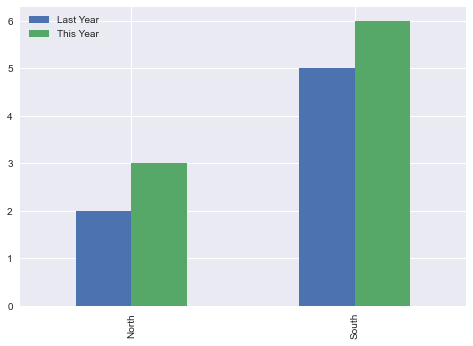

In [53]:
# 판다스 그래프 메서드가 반환하는 '축' 객체에서
# 그림을 가져올 수 있습니다. "T"는 데이터프레임을 변환해
# 원하는 방향으로 그래프를 그립니다
ax = df.T.plot.bar()
fig = ax.get_figure()

In [54]:
# 그래프를 엑셀에 보냅니다
plot = sheet1.pictures.add(fig, name="SalesPlot",
                           top=sheet1["H19"].top,
                           left=sheet1["H19"].left)
# 그래프를 70%로 축소합니다
plot.width, plot.height = plot.width * 0.7, plot.height * 0.7

In [55]:
ax = (df + 1).T.plot.bar()
plot = plot.update(ax.get_figure())

In [56]:
# 기본 스코프는 워크북입니다
sheet1["A1:B2"].name = "matrix1"

In [57]:
# 시트 스코프를 사용할 때는 시트 이름과 느김표를 앞에 붙입니다
sheet1["B10:E11"].name = "Sheet1!matrix2"

In [58]:
# 이제 이름으로 범위에 접근합니다
sheet1["matrix1"]

<Range [통합 문서2]Sheet1!$A$1:$B$2>

In [59]:
# sheet1 객체를 통해 names 컬렉션에 접근하면
# 해당 시트의 스코프에 존재하는 이름만 들어 있습니다
sheet1.names

[<Name 'Sheet1!matrix2': =Sheet1!$B$10:$E$11>]

In [60]:
# book 객체를 통해 names 컬렉션에 접근하면
# 워크북과 시트 스코프에 정의된 이름이 모무 포함됩니다
book.names

[<Name 'matrix1': =Sheet1!$A$1:$B$2>, <Name 'Sheet1!matrix2': =Sheet1!$B$10:$E$11>]

In [61]:
# names 컬랙션에는 다영한 메서드와 속성이 있습니다
# 예를 들어 가각의 범위 객체를 가져올 수도 있습니다
book.names["matrix1"].refers_to_range

<Range [통합 문서2]Sheet1!$A$1:$B$2>

In [62]:
# 상수나 수식에 이름을 할당려면
# add 메서드를 사용하십시오
book.names.add("EURUSD", "=1.1151")

<Name 'EURUSD': =1.1151>

# 엑셀윙스 고급 주제

## 성능 향상

In [63]:
# A시트를 추가하고 데스트에 사용할 150개의 값을 기록합니다
sheet2 = book.sheets.add()
sheet2["A1"].value = np.arange(150).reshape(30, 5)

In [64]:
%%time
# 애플리케이션 간 호출이 150번 일어납니다
for cell in sheet2["A1:E30"]:
    cell.value += 1

CPU times: total: 156 ms
Wall time: 316 ms


In [65]:
%%time
# 애플리케이션 간 호출이 단 두 번 일어납니다
values = sheet2["A1:E30"].options(np.array).value
sheet2["A1:E30"].value = values + 1

CPU times: total: 31.2 ms
Wall time: 35.9 ms


In [66]:
# 값 원형을 쓰면 반드시 대상 범위 전체를 명시해야 하며
# sheet["A35"] 같은 편리한 방법은 쓸 수 없습니다
sheet1["A35:B36"].options("raw").value = [[1, 2], [3, 4]]